<a href="https://colab.research.google.com/github/SehanArandara/DL-Codepro/blob/main/10_LSTM_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM

- in here we are going to implement a next word prediction AI by using the LSTM



- in here we are going to give the senstance by line by line
- we have to define the input and the next output

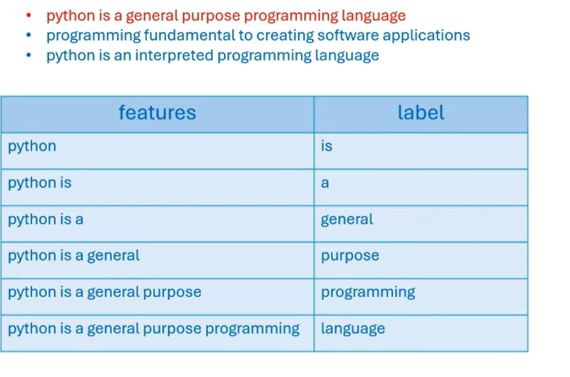

- we have to convert these things to the numerical values for that we can use some tokanizers to do that

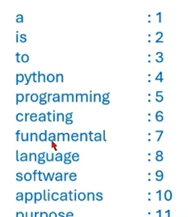

- we can see the chart like this
- 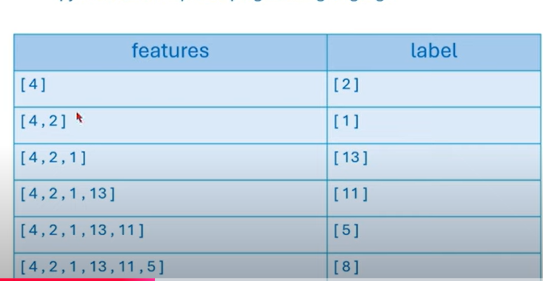

- we have to add padding to all the features

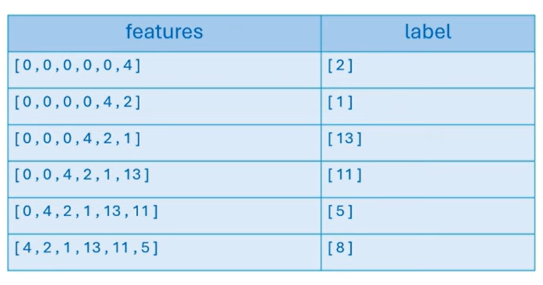


In [2]:
import numpy as np
import tensorflow as tf

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od

od.download('https://www.kaggle.com/datasets/ronikdedhia/next-word-prediction/code')

Skipping, found downloaded files in "./next-word-prediction" (use force=True to force download)


In [5]:
with open('/content/next-word-prediction/1661-0.txt','r',encoding='utf-8') as file:
  text = file.read()

In [6]:
text

'\ufeff\nProject Gutenberg\'s The Adventures of Sherlock Holmes, by Arthur Conan Doyle\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.net\n\n\nTitle: The Adventures of Sherlock Holmes\n\nAuthor: Arthur Conan Doyle\n\nRelease Date: November 29, 2002 [EBook #1661]\nLast Updated: May 20, 2019\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***\n\n\n\nProduced by an anonymous Project Gutenberg volunteer and Jose Menendez\n\n\n\ncover\n\n\n\nThe Adventures of Sherlock Holmes\n\n\n\nby Arthur Conan Doyle\n\n\n\nContents\n\n\n   I.     A Scandal in Bohemia\n   II.    The Red-Headed League\n   III.   A Case of Identity\n   IV.    The Boscombe Valley Mystery\n   V.     The Five Orange Pips\n   VI.    The Man wi

In [7]:
# we have to use the tokenizer to convert these things to the numeric values

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts([text])

In [8]:
tokenizer.get_config()    # outputs the whole data with indexes

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 1,
 'word_counts': '{"\\ufeff": 1, "project": 90, "gutenberg\'s": 1, "the": 5715, "adventures": 11, "of": 2770, "sherlock": 101, "holmes": 442, "by": 363, "arthur": 19, "conan": 4, "doyle": 4, "this": 496, "ebook": 11, "is": 1125, "for": 741, "use": 46, "anyone": 29, "anywhere": 4, "at": 772, "no": 325, "cost": 6, "and": 2949, "with": 876, "almost": 20, "restrictions": 2, "whatsoever": 2, "you": 1394, "may": 209, "copy": 14, "it": 1566, "give": 62, "away": 107, "or": 272, "re": 4, "under": 49, "terms": 24, "gutenberg": 99, "license": 18, "included": 4, "online": 4, "www": 10, "net": 2, "title": 3, "author": 1, "release": 1, "date": 11, "november": 1, "29": 1, "2002": 1, "1661": 4, "last": 92, "updated": 2, "20": 2, "2019": 1, "language": 2, "english": 10, "character": 20, "set": 52, "encoding": 1, "utf": 1, "8": 7, "start": 

In [9]:
# show the line by line with index and word

input_sequences = []
for sentence in text.split('\n'):
  # print(sentence)
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]
  # print(tokenized_sentence)

  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])

In [10]:
input_sequences[:5]

[[145, 4790],
 [145, 4790, 1],
 [145, 4790, 1, 1020],
 [145, 4790, 1, 1020, 4],
 [145, 4790, 1, 1020, 4, 128]]

In [11]:
max_length = max([len(input_sequences) for input_sequences in input_sequences])
max_length

20

In [12]:
input_sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(input_sequences,maxlen=max_length,padding='pre'))

In [13]:
input_sequences[:5]     # we have to do add padding to this

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  145, 4790],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,  145, 4790,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  145, 4790,    1, 1020],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  145, 4790,    1, 1020,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,  145, 4790,    1, 1020,    4,  128]],
      dtype=int32)

In [14]:
X = input_sequences[:,:-1]
y = input_sequences[:,-1]

In [15]:
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  145],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,  145, 4790],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  145, 4790,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  145, 4790,    1, 1020],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,  145, 4790,    1, 1020,    4]], dtype=int32)

In [16]:
y[:5]

array([4790,    1, 1020,    4,  128], dtype=int32)

In [17]:
# we have to get the how many classes in this

num_of_classes = len(tokenizer.word_index) + 1
num_of_classes

8932

In [18]:
y= np.array(tf.keras.utils.to_categorical(y,num_classes=num_of_classes))

In [19]:
print(y[1])

[0. 1. 0. ... 0. 0. 0.]


In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(num_of_classes,80,input_length=max_length-1))
model.add(tf.keras.layers.LSTM(100))
model.add(tf.keras.layers.Dense(num_of_classes,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [21]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(X,y,epochs=10)